In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(columns='ID')
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.describe()

,Age,Work_Experience,Family_Size
count,7651.000000,6845.000000,7319.000000
mean,43.584368,2.728415,2.852712
std,16.525300,3.449225,1.549283
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,5.000000,4.000000
max,89.000000,14.000000,9.000000


In [6]:
df.Var_1.value_counts()

Var_1
Cat_6    4860
Cat_4    1074
Cat_3     811
Cat_2     412
Cat_7     203
Cat_1     131
Cat_5      84
Name: count, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.Work_Experience = df.Work_Experience.astype(dtype='int8')

In [9]:
df['Family_Size'] = df.Family_Size.astype(dtype='int8')

<Axes: ylabel='Frequency'>

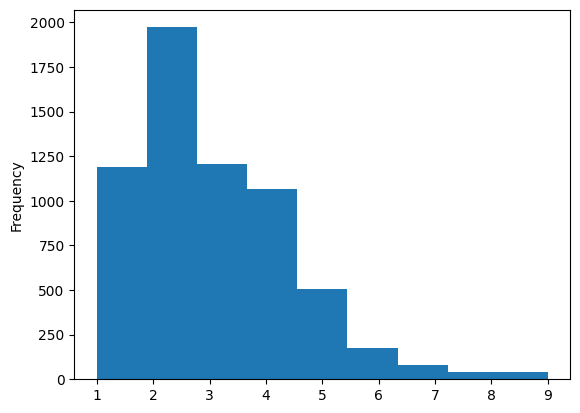

In [10]:
df.Family_Size.plot(kind='hist',bins=9)

<Axes: xlabel='Segmentation'>

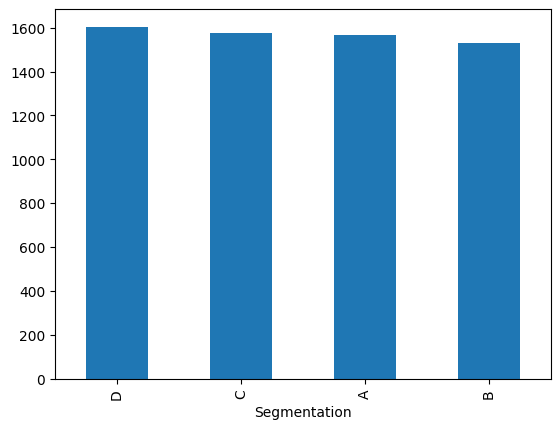

In [11]:
df.Segmentation.value_counts().plot(kind='bar')

<Axes: xlabel='Work_Experience'>

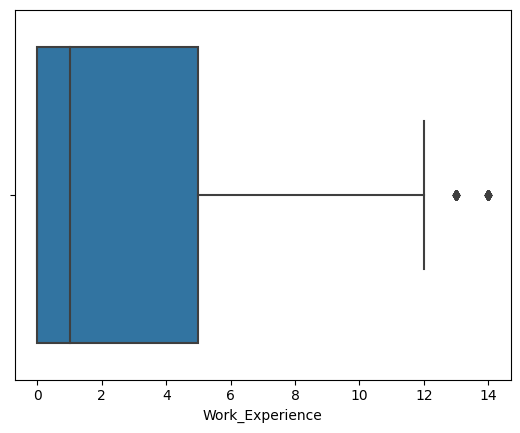

In [12]:
sns.boxplot(data=df,x='Work_Experience')

<Axes: xlabel='Age'>

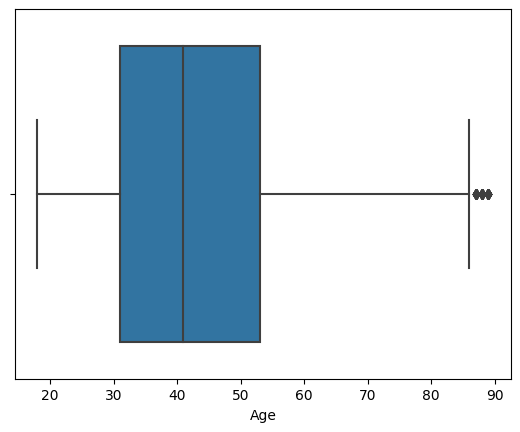

In [13]:
sns.boxplot(x=df.Age)

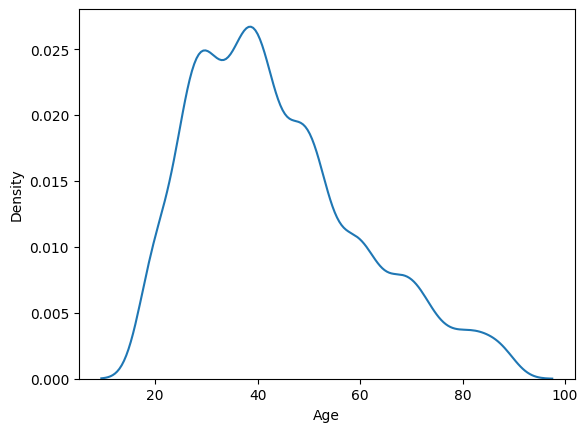

In [14]:
def check_dist(data):
    sns.kdeplot(data)
check_dist(df.Age)    

C:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


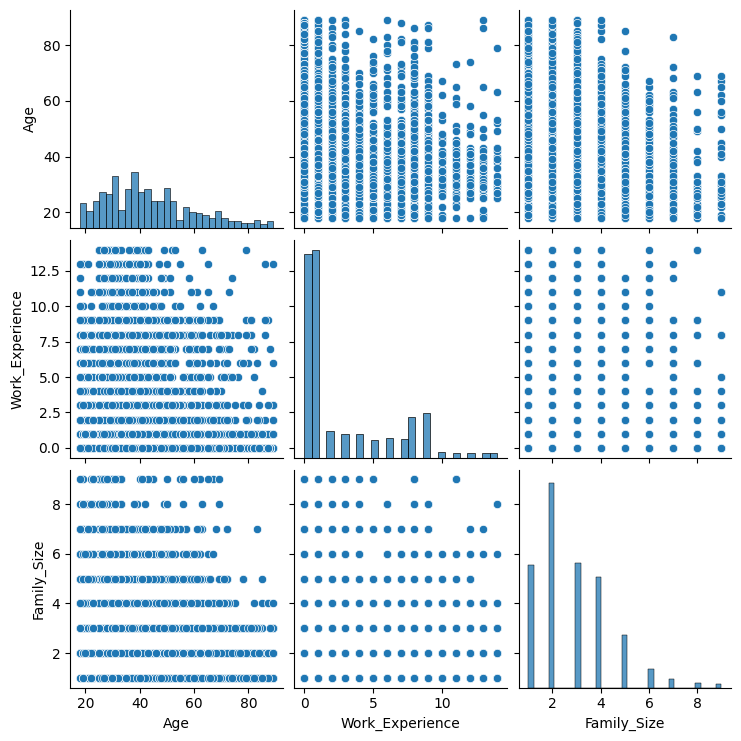

In [15]:
sns.pairplot(df)

<Axes: >

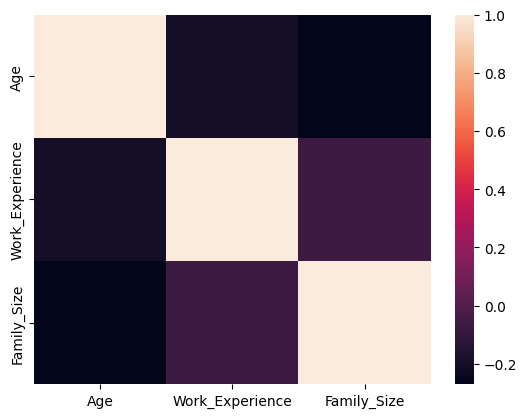

In [16]:
sns.heatmap(df.corr(numeric_only=True))

In [17]:
df.Age.nunique()

67

In [18]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df.Family_Size.unique()

array([4, 1, 2, 3, 5, 6, 8, 7, 9], dtype=int8)

In [20]:
df.Work_Experience.unique()

array([ 1,  0,  4,  9, 12,  3, 13,  5,  8, 14,  7,  2,  6, 10, 11],
      dtype=int8)

In [21]:
from sklearn.preprocessing import OrdinalEncoder
order_encode = OrdinalEncoder(categories= [['Low','Average','High']])
df['Spending_Score'] = order_encode.fit_transform(df['Spending_Score'].values.reshape(-1,1))


In [22]:
df = pd.get_dummies(df,columns=['Graduated','Gender','Profession','Ever_Married'])

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
df['Age'] = scaled.fit_transform(df['Age'].values.reshape(-1,1))

In [24]:
df = df.reset_index().drop(columns = 'index')

In [25]:
df = df.drop(columns=['Var_1','Segmentation'])

In [26]:
from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    errors.append(kmeans.inertia_)

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

<Axes: >

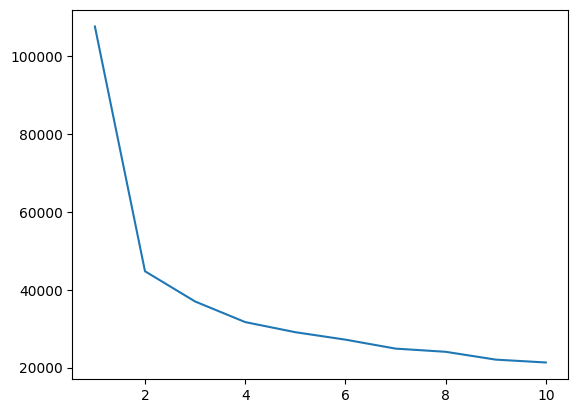

In [27]:
sns.lineplot(y=errors,x=range(1,11))

In [28]:
k_means = KMeans(n_clusters=4)
k_means.fit_predict(df)

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 3, ..., 0, 2, 3])

In [45]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2)
ac.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(df,kmeans.labels_)
print(kmeans_score)

0.19612894576792603


In [46]:
ac_score = silhouette_score(df,ac.labels_)
ac_score

0.5286769028850021

In [56]:
dbscan_score = silhouette_score(df,dbscan.labels_)
dbscan_score

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)